In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import eig

plt.rcParams['font.sans-serif'] = ['SimHei']

# Cluster Method
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# 参数设置

In [2]:
# ============
# Generate datasets
# ============
np.random.seed(438)
n_samples = 1500 # sample size

# ============
# Definitions of Functions
# ============
def mat_sqrt(Mat):
    eig_value,eig_vec = eig(Mat)
    return(eig_vec.dot(np.diag(np.sqrt(eig_value)).dot(eig_vec.T)))

# 构造第六种人工数据集

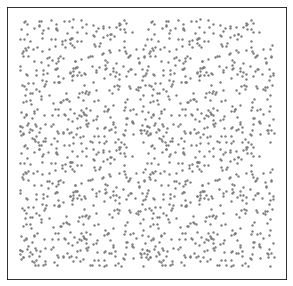

In [3]:
# 数据共分为4块，左上角，右上角，左下角，右下角
K = 4
n_subset = int(n_samples / K)

lb = -1
rb = 1

z = np.random.uniform(0, rb, (n_subset, 2))

m1 = np.array([0, 0])
m2 = np.array([-1, 0])
m3 = np.array([0, -1])
m4 = np.array([-1, -1])

x11 = z + m1
x12 = z + m2
x13 = z + m3
x14 = z + m4

dataset6 = np.r_[x11, x12, x13, x14]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11[:,0],x11[:,1],color="grey",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="grey",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="grey",s = 2)
plt.scatter(x14[:,0],x14[:,1],color="grey",s = 2)

# 使用不同聚类方式对不同数据集聚类

## 数据集1

### 原数据

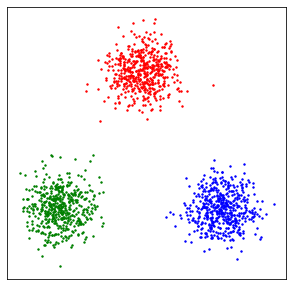

In [4]:
## Case One : Simple Case (Equal Variance and Equal Size)
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))

mu1 = np.array([0,1])
mu2 = np.array([-math.sqrt(2),-math.sqrt(2)])
mu3 = np.array([math.sqrt(2),-math.sqrt(2)])

x11 = z1 + mu1
x12 = z2 + mu2
x13 = z3 + mu3
dataset1 = np.r_[x11,x12,x13]
labels1 = np.zeros(n_samples)
labels1[n_subset:2*n_subset] = 1
labels1[2*n_subset:3*n_subset] = 2

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11[:,0],x11[:,1],color="red",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="green",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="blue",s = 2)

### 自下而上的层次聚类

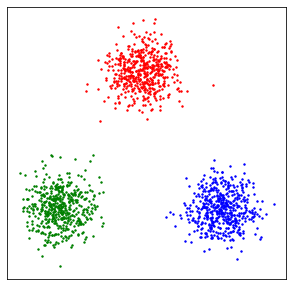

In [5]:
model11 = AgglomerativeClustering(n_clusters=K).fit(dataset1)

labels11 = model11.fit_predict(dataset1)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels11[i] == 0:
        x11_ = np.r_[x11_, dataset1[i].reshape((1, 2))]
    elif labels11[i] == 1:
        x12_ = np.r_[x12_, dataset1[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset1[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### KMeans

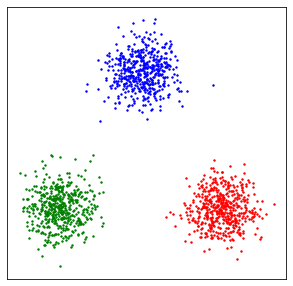

In [6]:
model12 = KMeans(n_clusters=K, init="k-means++", n_init='auto', algorithm='elkan').fit(dataset1)

labels12 = model12.fit_predict(dataset1)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels12[i] == 0:
        x11_ = np.r_[x11_, dataset1[i].reshape((1, 2))]
    elif labels12[i] == 1:
        x12_ = np.r_[x12_, dataset1[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset1[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### GMM

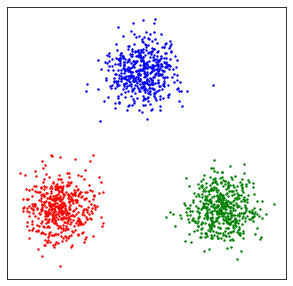

In [7]:
model13 = GaussianMixture(n_components=K, init_params='random_from_data').fit(dataset1)

labels13 = model13.fit_predict(dataset1)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels13[i] == 0:
        x11_ = np.r_[x11_, dataset1[i].reshape((1, 2))]
    elif labels13[i] == 1:
        x12_ = np.r_[x12_, dataset1[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset1[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### DBSCAN

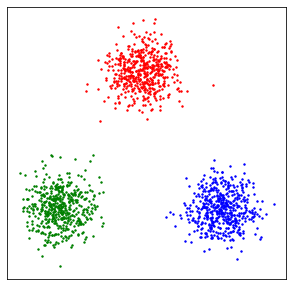

In [8]:
model14 = DBSCAN().fit(dataset1)

labels14 = model14.fit_predict(dataset1)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels14[i] == 0:
        x11_ = np.r_[x11_, dataset1[i].reshape((1, 2))]
    elif labels14[i] == 1:
        x12_ = np.r_[x12_, dataset1[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset1[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

## 数据集2

### 原数据

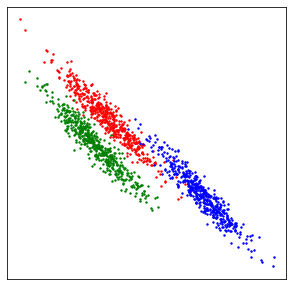

In [9]:
## Case Two : High-Covariance Case 
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))

mu1 = np.array([-0.7,1])
rho1 = -0.95
mu2 = np.array([-1,0.5])
mu3 = np.array([1.25,-0.5])
Sigma = np.array([[1,rho1],[rho1,1]])
sigma1 = 0.5

x21 =  z1.dot(mat_sqrt(Sigma)*sigma1) + mu1
x22 = z2.dot(mat_sqrt(Sigma)*sigma1) + mu2
x23 = z3.dot(mat_sqrt(Sigma)*sigma1) + mu3
dataset2 = np.r_[x21,x22,x23]
labels2 = np.zeros(n_samples)
labels2[n_subset:2*n_subset] = 1
labels2[2*n_subset:3*n_subset] = 2

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x21[:,0],x21[:,1],color="red",s = 2)
plt.scatter(x22[:,0],x22[:,1],color="green",s = 2)
plt.scatter(x23[:,0],x23[:,1],color="blue",s = 2)

### 自下而上的层次聚类

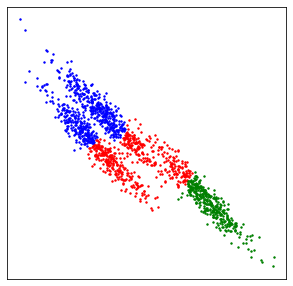

In [10]:
model21 = AgglomerativeClustering(n_clusters=K).fit(dataset2)

labels21 = model21.fit_predict(dataset2)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels21[i] == 0:
        x11_ = np.r_[x11_, dataset2[i].reshape((1, 2))]
    elif labels21[i] == 1:
        x12_ = np.r_[x12_, dataset2[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset2[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### KMeans

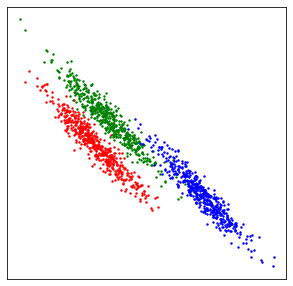

In [11]:
model22 = KMeans(n_clusters=K, init="k-means++", n_init='auto', algorithm='elkan').fit(dataset2)

labels22 = model22.fit_predict(dataset1)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels22[i] == 0:
        x11_ = np.r_[x11_, dataset2[i].reshape((1, 2))]
    elif labels22[i] == 1:
        x12_ = np.r_[x12_, dataset2[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset2[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### GMM

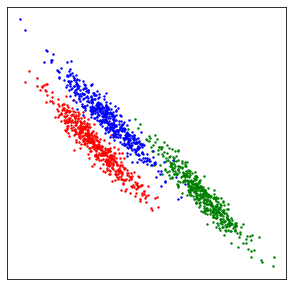

In [12]:
model23 = GaussianMixture(n_components=K, init_params='random_from_data').fit(dataset2)

labels23 = model23.fit_predict(dataset1)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels13[i] == 0:
        x11_ = np.r_[x11_, dataset2[i].reshape((1, 2))]
    elif labels13[i] == 1:
        x12_ = np.r_[x12_, dataset2[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset2[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### DBSCAN

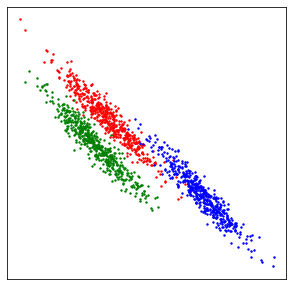

In [13]:
model24 = DBSCAN().fit(dataset2)

labels24 = model24.fit_predict(dataset2)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels14[i] == 0:
        x11_ = np.r_[x11_, dataset2[i].reshape((1, 2))]
    elif labels14[i] == 1:
        x12_ = np.r_[x12_, dataset2[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset2[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

## 数据集3

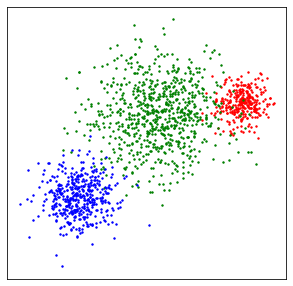

In [14]:
## Case Three : Unequal variance and Unequal size
mu1 = np.array([1.5,0.5])
mu2 = np.array([0.2,0.3])
mu3 = np.array([-1,-1])
sigma = 0.1
sigma1 = 2*sigma
sigma2 = 5*sigma
sigma3 = 3*sigma
n_subset1 = int(sigma1/(sigma1+sigma2+sigma3)*n_samples)
n_subset2 = int(sigma2/(sigma1+sigma2+sigma3)*n_samples)
n_subset3 = int(sigma3/(sigma1+sigma2+sigma3)*n_samples)

x31 = np.random.normal(loc = 0, scale = sigma1,size = (n_subset1,2)) + mu1
x32 = np.random.normal(loc = 0, scale = sigma2,size = (n_subset2,2)) + mu2
x33 = np.random.normal(loc = 0, scale = sigma3,size = (n_subset3,2)) + mu3

dataset3 = np.r_[x31,x32,x33]
labels3 = np.zeros(n_samples)
labels3[n_subset:2*n_subset] = 1
labels3[2*n_subset:3*n_subset] = 2

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x31[:,0],x31[:,1],color="red",s = 2)
plt.scatter(x32[:,0],x32[:,1],color="green",s = 2)
plt.scatter(x33[:,0],x33[:,1],color="blue",s = 2)

### 自下而上的层次聚类

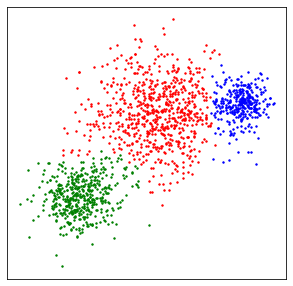

In [15]:
model31 = AgglomerativeClustering(n_clusters=K).fit(dataset3)

labels31 = model31.fit_predict(dataset3)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels31[i] == 0:
        x11_ = np.r_[x11_, dataset3[i].reshape((1, 2))]
    elif labels31[i] == 1:
        x12_ = np.r_[x12_, dataset3[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset3[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### KMeans

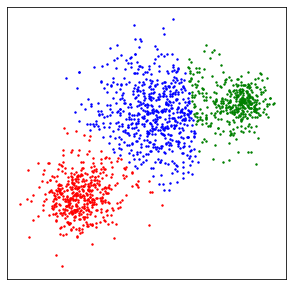

In [16]:
model32 = KMeans(n_clusters=K, init="k-means++", n_init='auto', algorithm='elkan').fit(dataset3)

labels32 = model32.fit_predict(dataset3)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels32[i] == 0:
        x11_ = np.r_[x11_, dataset3[i].reshape((1, 2))]
    elif labels32[i] == 1:
        x12_ = np.r_[x12_, dataset3[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset3[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### GMM

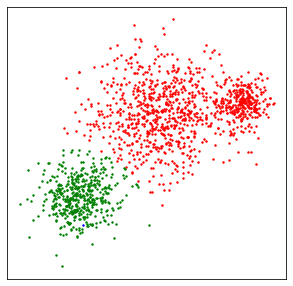

In [17]:
model33 = GaussianMixture(n_components=K, init_params='random_from_data').fit(dataset3)

labels33 = model33.fit_predict(dataset3)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels33[i] == 0:
        x11_ = np.r_[x11_, dataset3[i].reshape((1, 2))]
    elif labels33[i] == 1:
        x12_ = np.r_[x12_, dataset3[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset3[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### DBSCAN

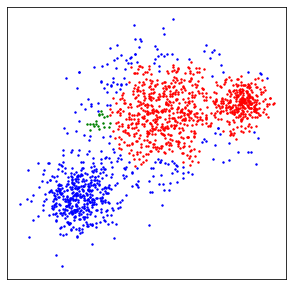

In [18]:
model34 = DBSCAN(eps=0.12, min_samples=8).fit(dataset3)

labels34 = model34.fit_predict(dataset3)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels34[i] == 0:
        x11_ = np.r_[x11_, dataset3[i].reshape((1, 2))]
    elif labels34[i] == 1:
        x12_ = np.r_[x12_, dataset3[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset3[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

## 数据集4

### 原数据

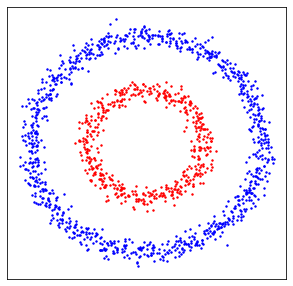

In [19]:
## Case Four : Ring Plot
r1 = 1
r2 = 2

K = r1+r2
n_subset1 = int(n_samples/K)
n_subset2 = int(n_samples/K*(K-1))
theta1 = np.linspace(1,360,n_subset1)/360*2*math.pi
theta2 = np.linspace(1,360,n_subset2)/360*2*math.pi
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset1,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset2,2))

x41 = np.transpose(np.array([[r1 * math.cos(theta1[i]) for i in range(len(theta1))],
               [r1 * math.sin(theta1[i]) for i in range(len(theta1))]])) + z1
x42 = np.transpose(np.array([[r2 * math.cos(theta2[i]) for i in range(len(theta2))],
               [r2 * math.sin(theta2[i]) for i in range(len(theta2))]])) + z2
dataset4 = np.r_[x41,x42]
labels4 = np.zeros(n_samples)
labels4[n_subset:2*n_subset] = 1
labels4[2*n_subset:3*n_subset] = 2

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x41[:,0],x41[:,1],color="red",s = 2)
plt.scatter(x42[:,0],x42[:,1],color="blue",s = 2)

### 自下而上的层次聚类

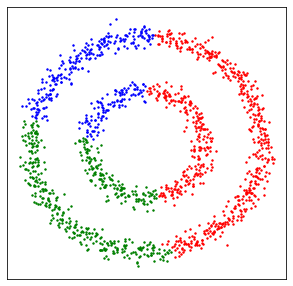

In [20]:
model41 = AgglomerativeClustering(n_clusters=K).fit(dataset4)

labels41 = model41.fit_predict(dataset4)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels41[i] == 0:
        x11_ = np.r_[x11_, dataset4[i].reshape((1, 2))]
    elif labels41[i] == 1:
        x12_ = np.r_[x12_, dataset4[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset4[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### KMeans

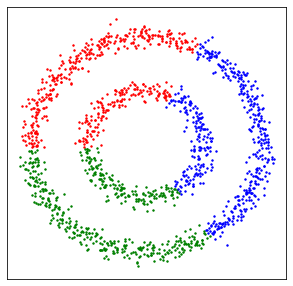

In [21]:
model42 = KMeans(n_clusters=K, init="k-means++", n_init='auto', algorithm='elkan').fit(dataset4)

labels42 = model42.fit_predict(dataset4)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels42[i] == 0:
        x11_ = np.r_[x11_, dataset4[i].reshape((1, 2))]
    elif labels42[i] == 1:
        x12_ = np.r_[x12_, dataset4[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset4[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### GMM

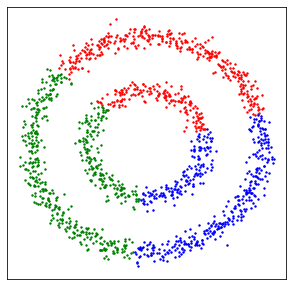

In [22]:
model43 = GaussianMixture(n_components=K, init_params='random_from_data').fit(dataset4)

labels43 = model43.fit_predict(dataset4)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels43[i] == 0:
        x11_ = np.r_[x11_, dataset4[i].reshape((1, 2))]
    elif labels43[i] == 1:
        x12_ = np.r_[x12_, dataset4[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset4[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

### DBSCAN

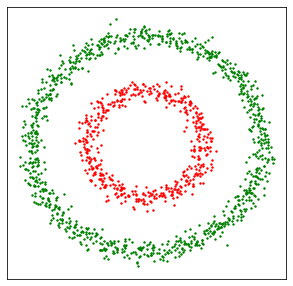

In [23]:
model44 = DBSCAN(eps=0.3).fit(dataset4)

labels44 = model44.fit_predict(dataset4)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))

for i in range(n_samples):
    if labels44[i] == 0:
        x11_ = np.r_[x11_, dataset4[i].reshape((1, 2))]
    elif labels44[i] == 1:
        x12_ = np.r_[x12_, dataset4[i].reshape((1, 2))]
    else:
        x13_ = np.r_[x13_, dataset4[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)

## 数据集5

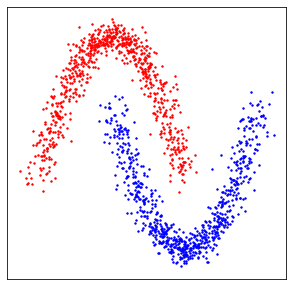

In [24]:
## Case Five : Wave Plot
K = 2
a = 1/(-1.2+0.5)**2
n_subset=int(n_samples/2)

x = np.linspace(-1.5,0.5,n_subset)
y1 = (-a)*(x+0.5)**2 + 1.5
y2 = (a)*(-x -0.5)**2 - 1.5
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))

x51 = np.c_[x,y1] + z1
x52 = np.c_[-x,y2] + z2
dataset5 = np.r_[x51,x52]
labels5 = np.zeros(n_samples)
labels5[n_subset:2*n_subset] = 1
labels5[2*n_subset:3*n_subset] = 2

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x51[:,0],x51[:,1],color="red",s = 2)
plt.scatter(x52[:,0],x52[:,1],color="blue",s = 2)


### 自下而上的层次聚类

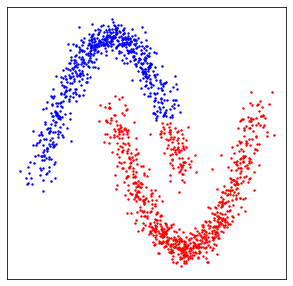

In [25]:
model51 = AgglomerativeClustering(n_clusters=K).fit(dataset5)

labels51 = model51.fit_predict(dataset5)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))

for i in range(n_samples):
    if labels51[i] == 0:
        x11_ = np.r_[x11_, dataset5[i].reshape((1, 2))]
    else:
        x12_ = np.r_[x12_, dataset5[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="blue",s = 2)


### KMeans

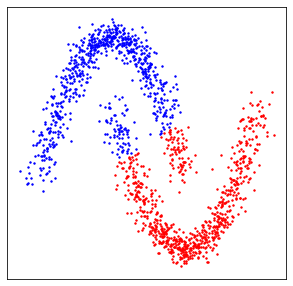

In [26]:
model52 = KMeans(n_clusters=K, init="k-means++", n_init='auto', algorithm='elkan').fit(dataset5)

labels52 = model52.fit_predict(dataset5)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))

for i in range(n_samples):
    if labels52[i] == 0:
        x11_ = np.r_[x11_, dataset5[i].reshape((1, 2))]
    else:
        x12_ = np.r_[x12_, dataset5[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="blue",s = 2)


### GMM

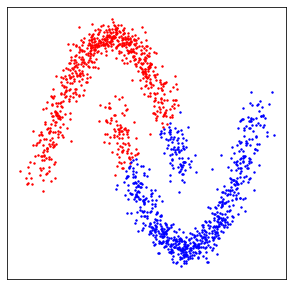

In [27]:
model53 = GaussianMixture(n_components=K, init_params='random_from_data').fit(dataset5)

labels53 = model53.fit_predict(dataset5)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))

for i in range(n_samples):
    if labels53[i] == 0:
        x11_ = np.r_[x11_, dataset5[i].reshape((1, 2))]
    else:
        x12_ = np.r_[x12_, dataset5[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="blue",s = 2)


### DBSCAN

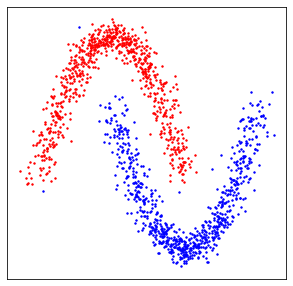

In [62]:
model54 = DBSCAN(eps=0.15, min_samples=5).fit(dataset5)

labels54 = model54.fit_predict(dataset5)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))

for i in range(n_samples):
    if labels54[i] == 0:
        x11_ = np.r_[x11_, dataset5[i].reshape((1, 2))]
    else:
        x12_ = np.r_[x12_, dataset5[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="blue",s = 2)


## 数据集6 

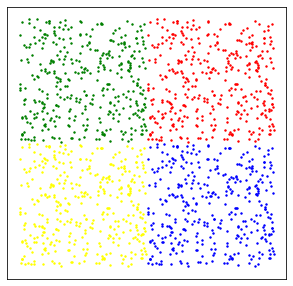

In [29]:
# 数据共分为4块，左上角，右上角，左下角，右下角
K = 4
n_subset = int(n_samples / K)

lb = -1
rb = 1

z = np.random.uniform(0, rb, (n_subset, 2))

m1 = np.array([0, 0])
m2 = np.array([-1, 0])
m3 = np.array([0, -1])
m4 = np.array([-1, -1])

x11 = z + m1
x12 = z + m2
x13 = z + m3
x14 = z + m4

dataset6 = np.r_[x11, x12, x13, x14]
labels6 = np.zeros(n_samples)
labels6[n_subset:2*n_subset] = 1
labels6[2*n_subset:3*n_subset] = 2

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11[:,0],x11[:,1],color="red",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="green",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="blue",s = 2)
plt.scatter(x14[:,0],x14[:,1],color="yellow",s = 2)

### 自下而上的层次聚类

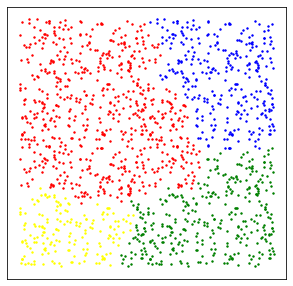

In [30]:
model61 = AgglomerativeClustering(n_clusters=K).fit(dataset6)

labels61 = model61.fit_predict(dataset6)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))
x14_ = np.empty((0, 2))

for i in range(n_samples):
    if labels61[i] == 0:
        x11_ = np.r_[x11_, dataset6[i].reshape((1, 2))]
    elif labels61[i] == 1:
        x12_ = np.r_[x12_, dataset6[i].reshape((1, 2))]
    elif labels61[i] == 2:
        x13_ = np.r_[x13_, dataset6[i].reshape((1, 2))]
    else:
        x14_ = np.r_[x14_, dataset6[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)
plt.scatter(x14_[:,0],x14_[:,1],color="yellow",s = 2)

### KMeans

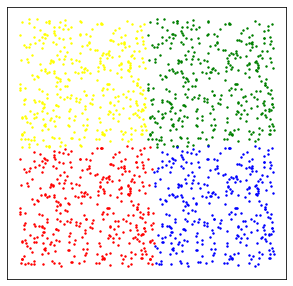

In [31]:
model62 = KMeans(n_clusters=K, init="k-means++", n_init='auto', algorithm='elkan').fit(dataset6)

labels62 = model62.fit_predict(dataset6)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))
x14_ = np.empty((0, 2))

for i in range(n_samples):
    if labels62[i] == 0:
        x11_ = np.r_[x11_, dataset6[i].reshape((1, 2))]
    elif labels62[i] == 1:
        x12_ = np.r_[x12_, dataset6[i].reshape((1, 2))]
    elif labels62[i] == 2:
        x13_ = np.r_[x13_, dataset6[i].reshape((1, 2))]
    else:
        x14_ = np.r_[x14_, dataset6[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)
plt.scatter(x14_[:,0],x14_[:,1],color="yellow",s = 2)

### GMM

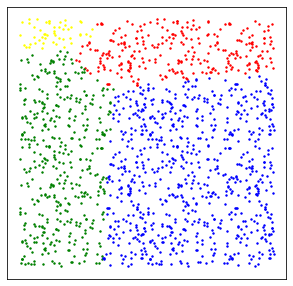

In [32]:
model63 = GaussianMixture(n_components=K, init_params='random_from_data').fit(dataset6)

labels63 = model63.fit_predict(dataset6)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))
x14_ = np.empty((0, 2))

for i in range(n_samples):
    if labels63[i] == 0:
        x11_ = np.r_[x11_, dataset6[i].reshape((1, 2))]
    elif labels63[i] == 1:
        x12_ = np.r_[x12_, dataset6[i].reshape((1, 2))]
    elif labels63[i] == 2:
        x13_ = np.r_[x13_, dataset6[i].reshape((1, 2))]
    else:
        x14_ = np.r_[x14_, dataset6[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)
plt.scatter(x14_[:,0],x14_[:,1],color="yellow",s = 2)

### DBSCAN

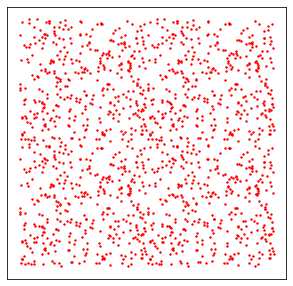

In [33]:
model64 = DBSCAN().fit(dataset6)

labels64 = model64.fit_predict(dataset6)

x11_ = np.empty((0, 2))
x12_ = np.empty((0, 2))
x13_ = np.empty((0, 2))
x14_ = np.empty((0, 2))

for i in range(n_samples):
    if labels64[i] == 0:
        x11_ = np.r_[x11_, dataset6[i].reshape((1, 2))]
    elif labels64[i] == 1:
        x12_ = np.r_[x12_, dataset6[i].reshape((1, 2))]
    elif labels64[i] == 2:
        x13_ = np.r_[x13_, dataset6[i].reshape((1, 2))]
    else:
        x14_ = np.r_[x14_, dataset6[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11_[:,0],x11_[:,1],color="red",s = 2)
plt.scatter(x12_[:,0],x12_[:,1],color="green",s = 2)
plt.scatter(x13_[:,0],x13_[:,1],color="blue",s = 2)
plt.scatter(x14_[:,0],x14_[:,1],color="yellow",s = 2)

# 聚类图整理

In [40]:
color = ["red", "green", "blue", "yellow"]
def draw(dataset, model, n):
    global n_samples
    label = model.fit_predict(dataset)
    
    x_ = [np.empty((0, 2)) for i in range(n)]

    for i in range(n_samples):
        try:
            x_[label[i]] = np.r_[x_[label[i]], dataset[i].reshape((1, 2))]
        except:
            continue

    plt.xticks(())
    plt.yticks(())

    for i in range(n):
        plt.scatter(x_[i][:, 0], x_[i][:, 1], color=color[i], s=2)

    

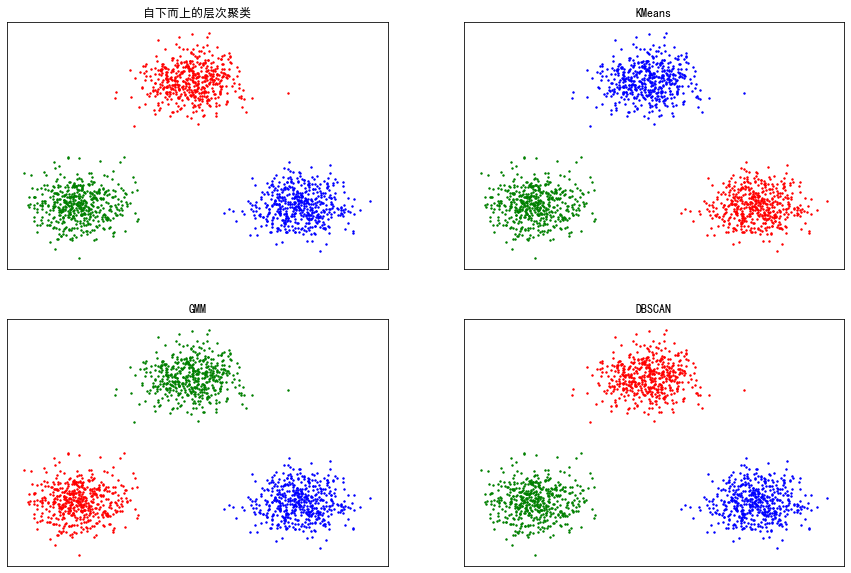

In [35]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
draw(dataset1, model11, 3)
plt.title("自下而上的层次聚类")

plt.subplot(222)
draw(dataset1, model12, 3)
plt.title("KMeans")

plt.subplot(223)
draw(dataset1, model13, 3)
plt.title("GMM")

plt.subplot(224)
draw(dataset1, model14, 3)
plt.title("DBSCAN")

plt.show()

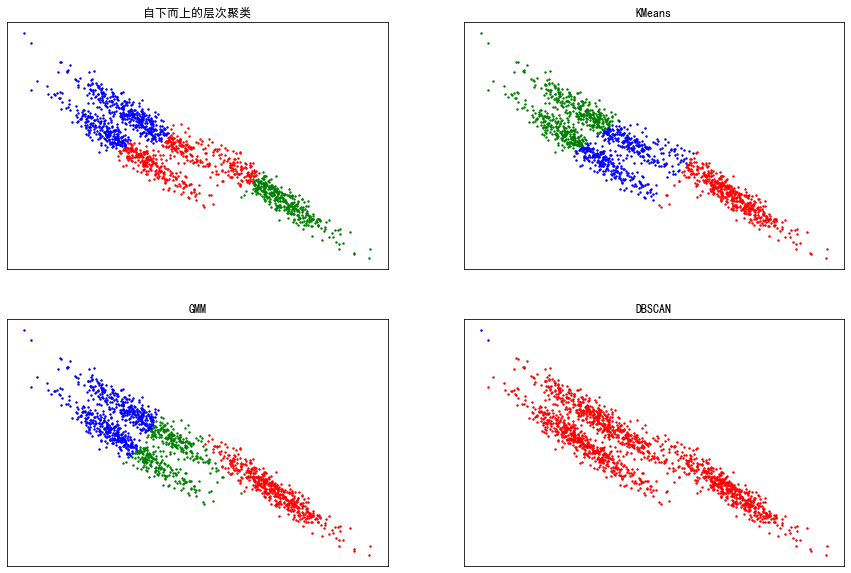

In [36]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
draw(dataset2, model21, 3)
plt.title("自下而上的层次聚类")

plt.subplot(222)
draw(dataset2, model22, 3)
plt.title("KMeans")

plt.subplot(223)
draw(dataset2, model23, 3)
plt.title("GMM")

plt.subplot(224)
draw(dataset2, model24, 3)
plt.title("DBSCAN")

plt.show()

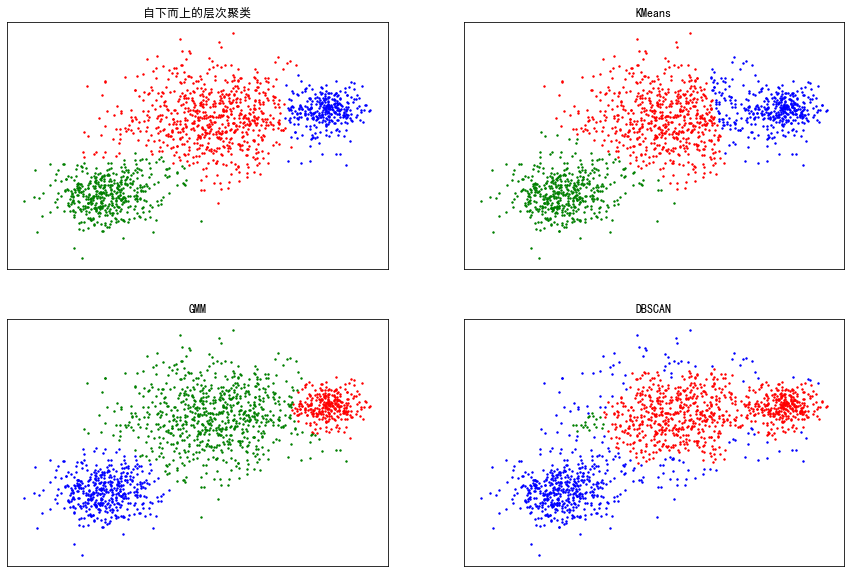

In [41]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
draw(dataset3, model31, 3)
plt.title("自下而上的层次聚类")

plt.subplot(222)
draw(dataset3, model32, 3)
plt.title("KMeans")

plt.subplot(223)
draw(dataset3, model33, 3)
plt.title("GMM")

plt.subplot(224)
draw(dataset3, model34, 3)
plt.title("DBSCAN")

plt.show()

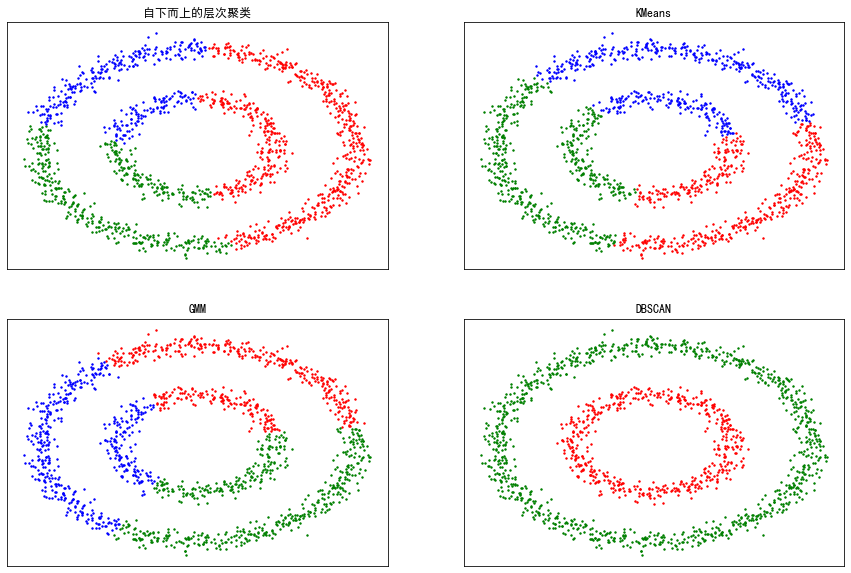

In [42]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
draw(dataset4, model41, 3)
plt.title("自下而上的层次聚类")

plt.subplot(222)
draw(dataset4, model42, 3)
plt.title("KMeans")

plt.subplot(223)
draw(dataset4, model43, 3)
plt.title("GMM")

plt.subplot(224)
draw(dataset4, model44, 3)
plt.title("DBSCAN")

plt.show()

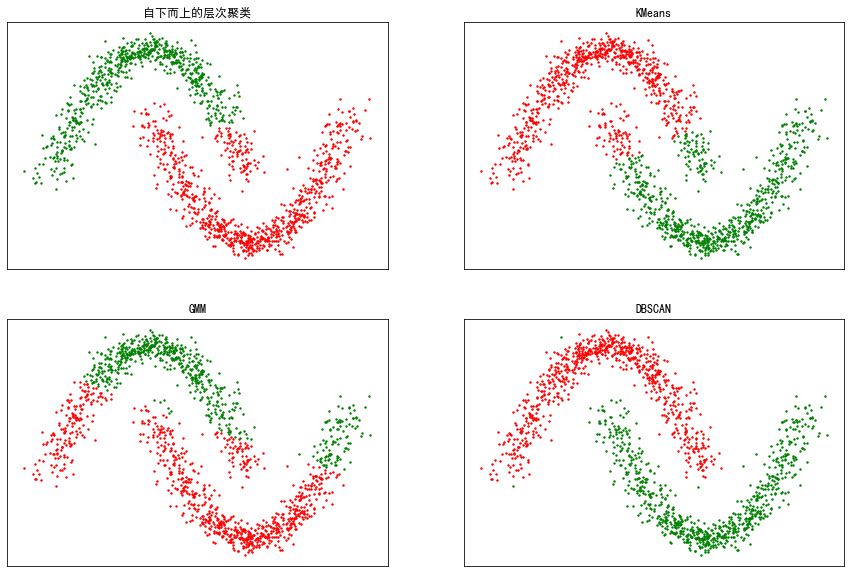

In [63]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
draw(dataset5, model51, 2)
plt.title("自下而上的层次聚类")

plt.subplot(222)
draw(dataset5, model52, 2)
plt.title("KMeans")

plt.subplot(223)
draw(dataset5, model53, 2)
plt.title("GMM")

plt.subplot(224)
draw(dataset5, model54, 2)
plt.title("DBSCAN")

plt.show()

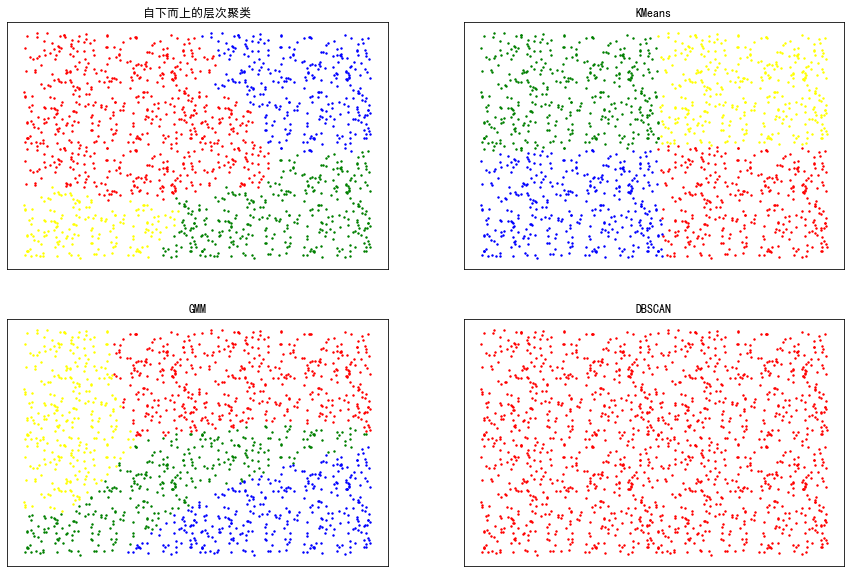

In [44]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
draw(dataset6, model61, 4)
plt.title("自下而上的层次聚类")

plt.subplot(222)
draw(dataset6, model62, 4)
plt.title("KMeans")

plt.subplot(223)
draw(dataset6, model63, 4)
plt.title("GMM")

plt.subplot(224)
draw(dataset6, model64, 4)
plt.title("DBSCAN")

plt.show()

# 聚类有效性

In [45]:
def purity(labels_true, labels_pred):
    clusters = np.unique(labels_pred)
    labels_true = np.reshape(labels_true, (-1, 1)).astype(int)
    labels_pred = np.reshape(labels_pred, (-1, 1)).astype(int)
    
    count = []
    for c in clusters:
        idx = np.where(labels_pred == c)[0]
        # 取出真实属于某个类的元素
        labels_tmp = labels_true[idx, :].reshape(-1)
        # 统计各个类的出现次数
        count.append(np.bincount(labels_tmp).max())
    return np.sum(count) / labels_true.shape[0]



In [64]:
print(purity(labels1, labels11))
print(purity(labels1, labels12))
print(purity(labels1, labels13))
print(purity(labels1, labels14))
print("-----------------------------")

print(purity(labels2, labels21))
print(purity(labels2, labels22))
print(purity(labels2, labels23))
print(purity(labels2, labels24))
print("-----------------------------")

print(purity(labels3, labels31))
print(purity(labels3, labels32))
print(purity(labels3, labels33))
print(purity(labels3, labels34))
print("-----------------------------")

print(purity(labels4, labels41))
print(purity(labels4, labels42))
print(purity(labels4, labels43))
print(purity(labels4, labels44))
print("-----------------------------")

print(purity(labels5, labels51))
print(purity(labels5, labels52))
print(purity(labels5, labels53))
print(purity(labels5, labels54))
print("-----------------------------")

print(purity(labels6, labels61))
print(purity(labels6, labels62))
print(purity(labels6, labels63))
print(purity(labels6, labels64))

1.0
1.0
1.0
1.0
-----------------------------
0.648
1.0
1.0
0.33466666666666667
-----------------------------
0.802
0.7813333333333333
0.63
0.64
-----------------------------
0.49333333333333335
0.5533333333333333
0.558
0.6666666666666666
-----------------------------
0.9393333333333334
0.896
0.8813333333333333
0.998
-----------------------------
0.7693333333333333
0.972
0.5613333333333334
0.5


In [65]:
def inner(labels, X):
    fenmu = np.sum((X - np.mean(X, axis=0)) ** 2)
    
    classes = np.unique(labels)
    K = len(classes)

    fenzi = 0
    for k in range(K):
        idx = np.where(labels == k)
        X_in_it = X[idx]

        fenzi += np.sum((X_in_it - np.mean(X_in_it, axis=0)) ** 2)

    return 1 - fenzi / fenmu  


In [66]:
print(inner(labels11, dataset1))
print(inner(labels12, dataset1))
print(inner(labels13, dataset1))
print(inner(labels14, dataset1))

0.9342179979440047
0.9342179979440047
0.9342179979440047
0.9342179979440047


In [67]:
print(inner(labels21, dataset2))
print(inner(labels22, dataset2))
print(inner(labels23, dataset2))
print(inner(labels24, dataset2))

0.820643060953617
0.7304261466493176
0.7304261466493176
0.008485837318915612


d:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\anaconda\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [68]:
print(inner(labels31, dataset3))
print(inner(labels32, dataset3))
print(inner(labels33, dataset3))
print(inner(labels34, dataset3))

0.8013316785237266
0.8167454625726801
0.6375848710453941
0.7723391480217948


In [69]:
print(inner(labels41, dataset4))
print(inner(labels42, dataset4))
print(inner(labels43, dataset4))
print(inner(labels44, dataset4))

0.588655257627894
0.6323075294702707
0.6334535037447524
1.7840598001139796e-06


In [70]:
print(inner(labels51, dataset5))
print(inner(labels52, dataset5))
print(inner(labels53, dataset5))
print(inner(labels54, dataset5))

0.6083759084977819
0.6464697229574562
0.6447513051208691
0.5640758617496235


In [71]:
print(inner(labels61, dataset6))
print(inner(labels62, dataset6))
print(inner(labels63, dataset6))
print(inner(labels64, dataset6))

0.6772225509006582
0.7461368036460757
0.572947053393333
0.0


数据集1
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>  1                </td>
        <td>  0.9342               </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>  1                </td>
        <td>  0.9342               </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>  1              </td>
        <td>  0.9342               </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  1               </td>
        <td>  0.9342             </td>
    </tr>
</table>

数据集2
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>  0.648               </td>
        <td>  0.8206             </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>  1                </td>
        <td>  0.7304               </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>  1              </td>
        <td>  0.7304               </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  0.3347               </td>
        <td>  0.0008               </td>
    </tr>
</table>

数据集3
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>  0802               </td>
        <td>  0.8013              </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>  0.7813                </td>
        <td>  0.8167               </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>  0.63              </td>
        <td>  0.6376               </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  0.64               </td>
        <td>  0.7723              </td>
    </tr>
</table>

数据集4
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>  0.4933             </td>
        <td>  0.5766              </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>  0.5533                </td>
        <td>  0.6234               </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>  0.558            </td>
        <td>  0.6257               </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  0.6667              </td>
        <td>  0.0001          </td>
    </tr>
</table>

数据集5
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>  0.9393             </td>
        <td>  0.6084            </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>  0.896                </td>
        <td>  0.6465              </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>  0.8813            </td>
        <td>  0.6448               </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  0.998              </td>
        <td>  0.5641          </td>
    </tr>
</table>

数据集6
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>  0.7693             </td>
        <td>  0.6772            </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>  0.972               </td>
        <td>  0.7461             </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>  0.5613            </td>
        <td>  0.5729              </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  0.5              </td>
        <td>  0          </td>
    </tr>
</table>

在这些聚类算法中，有些算法使用场景较广，有些算法在某些特定场合才能发挥出它的作用。

KMeans算法是这些算法中使用场景最多的算法。可以注意到在这6个数据集中，KMeans算法的评价指标的值都较大。如果使用KMeans++算法寻找初始迭代点，则能在一开始就将中心点分离地较远，在后续不断迭代的过程中，由于所有点都会往最近的中心点靠拢，所以不同类的点能够有效的分开，使得外部有效性指标较大。此外，由于所有点都向中心点靠拢，所以内部的方差也会较小。最终的分类结果较为均匀。尤其是最后一张图，虽然从宏观视角来看是随机分布的，但是KMeans仍然将它们分为4等分的数据

DBSCAN算法则体现出明显的倾向性。在数据集1，3，4，5中发挥了它强大的作用。由于这些数据集中数据在一开始就有较为明显的分界线。如数据集1和3中三个团，数据集4中的圆环，数据集5中的月牙。它能够有效的将核心点附近的点联系在一起，而将较远的点分离开。DBSCAN算法的调参过程也是最为复杂的。需要考虑点点之间合适的距离范围，从某种角度上来说，它需要看着数据集最初的形状来估计参数，从而达到期望的效果。

但是对于较为密集的数据集来说，DBSCAN算法无法实现聚类。DBSCAN的思想是：邻居的邻居也是自己的邻居。对于第六个数据集来说，所有的数据随机分布在平面上，两点间的距离较小，所以通过不断的传播，DBSCAN会将所有的点归到一个类中。

其余两种算法没有特别的倾向性。对于层次聚类算法，它能够通过自下而上的聚类不断将距离最近的两个点联系起来，超过若干层连接的点会被分到不同的聚类中。缺点是复杂度较高，时间开销较大。

对于GMM模型来说，它通过预测高斯分布来聚类，这也是它区别于其他算法的标志。在数据分布不明显时，它的作用能够被发挥出来。